# Proyek Analisis Data: [Air Quality Dataset in Tiantan]
- **Nama:** [Kheni Hikmah Lestari]
- **Email:** [m001d4kx1593@bangkit.academy]
- **ID Dicoding:** [khenihikmah130303]

## Menentukan Pertanyaan Bisnis

- Bagaimana pola perubahan kualitas udara dari tahun ke tahun? Apakah ada tren peningkatan atau penurunan?
- Bagaimana O3 memengaruhi perubahan temperatur setiap tahunnya?
- Bagaimana Hubungan rata-rata PM2.5 dengan rata-rata PM10 pada tahun 2016?

## Import Semua Packages/Library yang Digunakan

## Data Wrangling

### Gathering Data

### Read CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import streamlit as st
import calendar
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [30]:
df = pd.read_csv(r"https://raw.githubusercontent.com/khenihikmah/Bangkit-Dashboard/master/dashboard/DataTiantan.csv")

In [31]:
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,20.0,48.0,2.0,NaN,500.0,NaN,12.5,1013.5,-16.2,0.0,NW,2.4,Tiantan
35060,35061,2017,2,28,20,11.0,34.0,3.0,36.0,500.0,NaN,11.6,1013.6,-15.1,0.0,WNW,0.9,Tiantan
35061,35062,2017,2,28,21,18.0,32.0,4.0,48.0,500.0,48.0,10.8,1014.2,-13.3,0.0,NW,1.1,Tiantan
35062,35063,2017,2,28,22,15.0,42.0,5.0,52.0,600.0,44.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Tiantan


In [32]:
# Fill missing values with the mean of each column
df_filled = df.fillna(df.mean())
df_filled

TypeError: can only concatenate str (not "int") to str

### Assessing Data


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32843 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       32843 non-null  int64  
 1   year     32843 non-null  int64  
 2   month    32843 non-null  int64  
 3   day      32843 non-null  int64  
 4   hour     32843 non-null  int64  
 5   PM2.5    32843 non-null  float64
 6   PM10     32843 non-null  float64
 7   SO2      32843 non-null  float64
 8   NO2      32843 non-null  float64
 9   CO       32843 non-null  float64
 10  O3       32843 non-null  float64
 11  TEMP     32843 non-null  float64
 12  PRES     32843 non-null  float64
 13  DEWP     32843 non-null  float64
 14  RAIN     32843 non-null  float64
 15  wd       32843 non-null  object 
 16  WSPM     32843 non-null  float64
 17  station  32843 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [7]:
df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [8]:
print("Data duplicated: ", df.duplicated().sum())

Data duplicated:  0


In [9]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,32843.000000,32843.000000,32843.000000,32843.000000,32843.000000,32843.000000,32843.000000,32843.000000,32843.000000,32843.000000,32843.000000,32843.000000,32843.000000,32843.000000,32843.000000,32843.000000
mean,17807.867217,2014.693481,6.533447,15.579697,11.527449,81.749840,105.627866,14.140742,53.213083,1297.434187,55.297030,13.632013,1012.607762,2.495482,0.065585,1.853415
std,10119.373561,1.178400,3.451280,8.802954,6.945901,79.881882,88.640813,19.785953,32.008904,1162.709669,58.395485,11.393054,10.178583,13.854362,0.802663,1.273672
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,9026.500000,2014.000000,4.000000,8.000000,6.000000,22.000000,40.000000,3.000000,28.000000,500.000000,7.000000,3.200000,1004.200000,-8.700000,0.000000,1.000000
50%,18025.000000,2015.000000,7.000000,15.000000,12.000000,58.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.500000,1012.300000,3.100000,0.000000,1.500000
75%,26551.500000,2016.000000,10.000000,23.000000,18.000000,113.000000,143.000000,17.000000,71.000000,1600.000000,80.000000,23.400000,1020.800000,15.100000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,230.000000,238.000000,10000.000000,674.000000,38.400000,1042.000000,28.800000,46.400000,10.500000


In [10]:
df.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,32843.000000,32843.000000,32843.000000,32843.000000,32843.000000,32843.000000,32843.000000,32843.000000,32843.000000,32843.000000,32843.000000,32843.000000,32843.000000,32843.000000,32843.000000,32843,32843.000000,32843
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENE,NaN,Tiantan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3652,NaN,32843
mean,17807.867217,2014.693481,6.533447,15.579697,11.527449,81.749840,105.627866,14.140742,53.213083,1297.434187,55.297030,13.632013,1012.607762,2.495482,0.065585,NaN,1.853415,NaN
std,10119.373561,1.178400,3.451280,8.802954,6.945901,79.881882,88.640813,19.785953,32.008904,1162.709669,58.395485,11.393054,10.178583,13.854362,0.802663,NaN,1.273672,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,NaN,0.000000,NaN
25%,9026.500000,2014.000000,4.000000,8.000000,6.000000,22.000000,40.000000,3.000000,28.000000,500.000000,7.000000,3.200000,1004.200000,-8.700000,0.000000,NaN,1.000000,NaN
50%,18025.000000,2015.000000,7.000000,15.000000,12.000000,58.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.500000,1012.300000,3.100000,0.000000,NaN,1.500000,NaN
75%,26551.500000,2016.000000,10.000000,23.000000,18.000000,113.000000,143.000000,17.000000,71.000000,1600.000000,80.000000,23.400000,1020.800000,15.100000,0.000000,NaN,2.400000,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32843 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       32843 non-null  int64  
 1   year     32843 non-null  int64  
 2   month    32843 non-null  int64  
 3   day      32843 non-null  int64  
 4   hour     32843 non-null  int64  
 5   PM2.5    32843 non-null  float64
 6   PM10     32843 non-null  float64
 7   SO2      32843 non-null  float64
 8   NO2      32843 non-null  float64
 9   CO       32843 non-null  float64
 10  O3       32843 non-null  float64
 11  TEMP     32843 non-null  float64
 12  PRES     32843 non-null  float64
 13  DEWP     32843 non-null  float64
 14  RAIN     32843 non-null  float64
 15  wd       32843 non-null  object 
 16  WSPM     32843 non-null  float64
 17  station  32843 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


#### Handing duplicate data

#### Handling missing value

#### Detect Missing Value

In [12]:
df.isna().count()

No         32843
year       32843
month      32843
day        32843
hour       32843
PM2.5      32843
PM10       32843
SO2        32843
NO2        32843
CO         32843
O3         32843
TEMP       32843
PRES       32843
DEWP       32843
RAIN       32843
wd         32843
WSPM       32843
station    32843
dtype: int64

### Fill Missing Value

##### Fill with mean/median/quartile

## Exploratory Data Analysis (EDA)

In [13]:
df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,32843.000000,32843.000000,32843.000000,32843.000000,32843.000000,32843.000000,32843.000000,32843.000000,32843.000000,32843.000000,32843.000000,32843.000000,32843.000000,32843.000000,32843.000000,32843,32843.000000,32843
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENE,NaN,Tiantan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3652,NaN,32843
mean,17807.867217,2014.693481,6.533447,15.579697,11.527449,81.749840,105.627866,14.140742,53.213083,1297.434187,55.297030,13.632013,1012.607762,2.495482,0.065585,NaN,1.853415,NaN
std,10119.373561,1.178400,3.451280,8.802954,6.945901,79.881882,88.640813,19.785953,32.008904,1162.709669,58.395485,11.393054,10.178583,13.854362,0.802663,NaN,1.273672,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,NaN,0.000000,NaN
25%,9026.500000,2014.000000,4.000000,8.000000,6.000000,22.000000,40.000000,3.000000,28.000000,500.000000,7.000000,3.200000,1004.200000,-8.700000,0.000000,NaN,1.000000,NaN
50%,18025.000000,2015.000000,7.000000,15.000000,12.000000,58.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.500000,1012.300000,3.100000,0.000000,NaN,1.500000,NaN
75%,26551.500000,2016.000000,10.000000,23.000000,18.000000,113.000000,143.000000,17.000000,71.000000,1600.000000,80.000000,23.400000,1020.800000,15.100000,0.000000,NaN,2.400000,NaN


array([[<Axes: title={'center': 'No'}>, <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>,
        <Axes: title={'center': 'SO2'}>],
       [<Axes: title={'center': 'NO2'}>, <Axes: title={'center': 'CO'}>,
        <Axes: title={'center': 'O3'}>, <Axes: title={'center': 'TEMP'}>],
       [<Axes: title={'center': 'PRES'}>,
        <Axes: title={'center': 'DEWP'}>,
        <Axes: title={'center': 'RAIN'}>,
        <Axes: title={'center': 'WSPM'}>]], dtype=object)

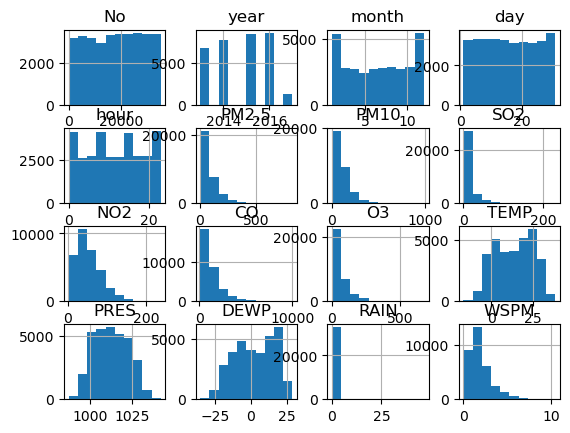

In [14]:
df.hist()

## Visualization & Explanatory Analysis

#### Data Visualization

Pertanyaan 1 : Bagaimana PM10 di setiap bulannya?

In [20]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']]).copy()

C:\Users\ACER\AppData\Local\Temp\ipykernel_20156\583033513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']]).copy()


In [23]:
df_monthly_mean = df.resample('M', on='datetime').mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=df_monthly_mean.index.month, y='PM10', data=df_monthly_mean)

plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=15)
plt.title("PM10 per Month", fontsize=24)
plt.xlabel("Months", fontsize=20)
plt.ylabel("PM10", fontsize=20)
plt.ylim(0, 200)

plt.show()


TypeError: agg function failed [how->mean,dtype->object]

2. Bagaimana median Jumlah O3 per Jam pada tahun tertentu?

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menggabungkan kolom 'year', 'month', 'day', dan 'hour' menjadi satu kolom datetime
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Mengagregasi data per bulan dan menghitung rata-rata untuk setiap bulan
df_monthly_median = df.resample('M', on='datetime').median()

# Mengatur parameter dan judul grafik
plt.figure(figsize=(10, 6))
sns.barplot(x=df_monthly_median.index.month, y='O3', data=df_monthly_median)
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=15)
plt.title("Median " + str('year'))
plt.xlabel("Jam")
plt.ylabel("O3")
plt.ylim(10, 100)

# Menampilkan grafik
plt.show()



C:\Users\ACER\AppData\Local\Temp\ipykernel_13464\1526715522.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])


TypeError: agg function failed [how->median,dtype->object]

### Conclution pertanyaan 1


Setiap tahun PM10 memiliki kenaikan dan penurunan jika dilihat dari plot. Hal ini berarti PM10 pada bulan tertentu memiliki kenaikan akibat adanya indrustri.

### Conclution pertanyaan 2

 Dari plot di atas dapat disimpulkan bahwa :
Pada tahun 2013, O3 sebesar 351,7164 dan Temperaturnya sebesar 33,9. Hal ini berarti pada tahun 2013, angka tingkat O3 sebesar 351,7164 menunjukkan konsentrasi ozon yang cukup tinggi. Ozon di atmosfer dapat berasal dari reaksi kimia kompleks antara berbagai senyawa. Suhu yang tinggi (33,9) umumnya dapat mendukung pembentukan ozon di udara, karena suhu yang lebih tinggi cenderung meningkatkan reaksi kimia yang menghasilkan ozon.

Pada tahun 2014, O3 sebesar 333 dan temperaturnya sebesar 35,3. Meskipun sedikit lebih rendah daripada tahun sebelumnya, tingkat O3 tetap tinggi (333) pada tahun 2014. Ini bisa menunjukkan bahwa Shunyi masih mengalami tingkat oksidasi ozon yang tinggi pada tahun tersebut.

Pada tahun 2015, O3 sebesar 340 dan temperaturnya sebesar 34. Meskipun ada sedikit perubahan dari tahun sebelumnya, tingkat O3 tetap tinggi (340) pada tahun 2015. Hal ini menunjukkan bahwa Shunyi masih mengalami tingkat oksidasi ozon yang cukup tinggi.

Pada tahun 2016, O3 sebesar 339 dan temperaturnya sebesar 36,6. Tingkat O3 pada tahun 2016 (339) tetap stabil dan cukup tinggi. Ini menunjukkan bahwa Shunyi masih mengalami tingkat oksidasi ozon yang cukup tinggi pada tahun tersebut.

Pada tahun 2017, O3 sebesar 173 dan temperaturnya sebesar 1,2. Terdapat penurunan yang signifikan dalam tingkat O3 dari tahun 2016 ke 2017, dari 339 menjadi 173. Ini merupakan penurunan yang cukup drastis dan dapat menunjukkan perubahan kondisi lingkungan atau faktor-faktor lainnya.